# Import the necessary libraries

pandas: Used for data manipulation and analysis, especially with tabular data like DataFrames.

seaborn: A statistical data visualization library based on matplotlib for attractive, informative plots.

matplotlib.pyplot: A plotting library for creating static, animated, and interactive visualizations in Python.

numpy: Provides support for large, multi-dimensional arrays and mathematical functions.

sklearn.linear_model.Lasso: Implements Lasso regression, which adds L1 regularization to linear models for feature selection.

sklearn.preprocessing.StandardScaler: Standardizes features by removing the mean and scaling to unit variance.

sklearn.feature_selection.RFE: Selects important features by recursively eliminating the least important ones.

sklearn.linear_model.LinearRegression: Fits a linear regression model to predict a target variable from features.

sklearn.model_selection.train_test_split: Splits the dataset into training and testing subsets.

sklearn.metrics.mean_squared_error: Measures the average squared difference between predicted and actual values.

sklearn.metrics.r2_score: Evaluates how well the regression model explains the variability of the target variable.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Import the Dataset
https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [8]:
df = pd.read_csv("/Users/prarthana/Downloads/winequality-red.csv")

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
print("Shape of dataset (rows, columns):", df.shape)

Shape of dataset (rows, columns): (1599, 12)


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Check for Null Values

In [13]:
# Count of null values per column
print("Null values per column:")
print(df.isnull().sum())

Null values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# Check for Duplicated rows and drop them

In [14]:
# Total number of duplicated rows
print("\nTotal duplicated rows:")
print(df.duplicated().sum())


Total duplicated rows:
240


In [15]:
df = df.drop_duplicates()

### Note: Not checking for outliers as it is a small dataset.

# Print the distribution of all the columns to analyse skewness

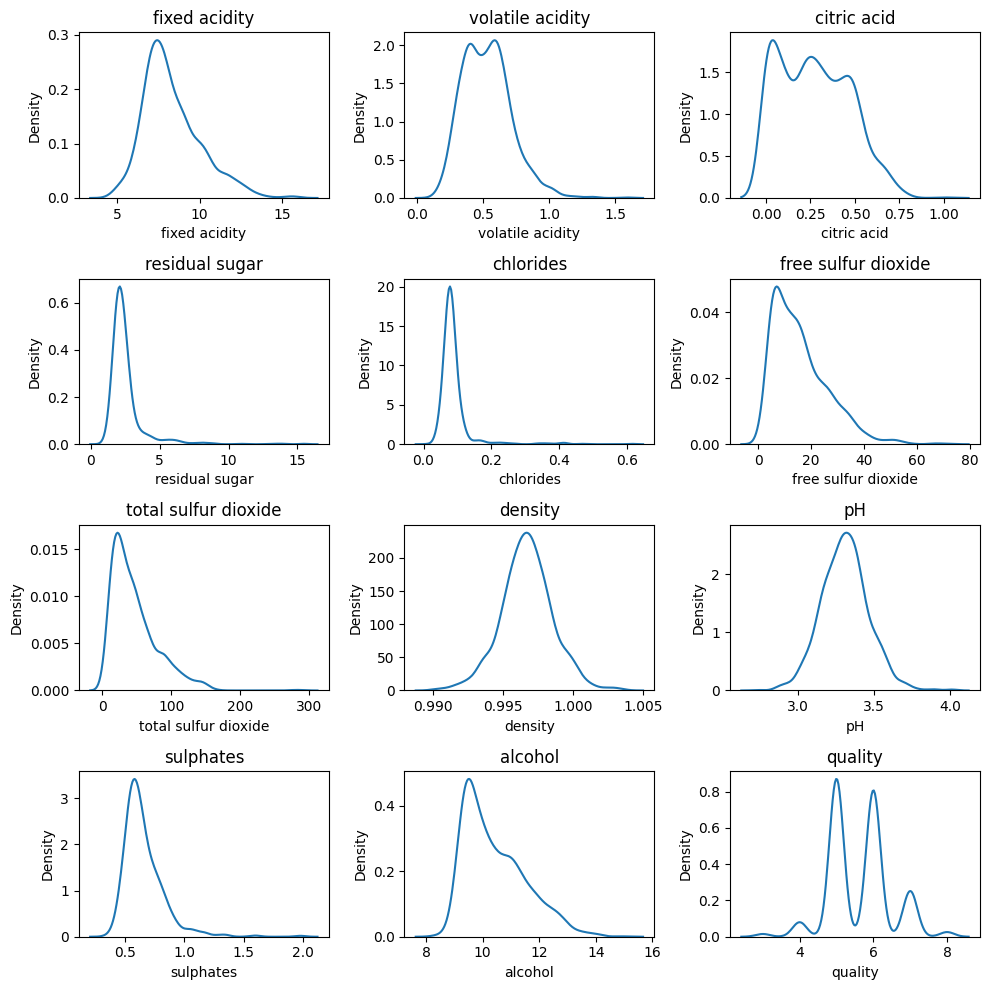

In [16]:
import warnings

# Suppress specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na option is deprecated.*")


# Optionally check that there are no inf values left
assert not np.isinf(df.select_dtypes(include='number')).values.any(), "Inf values still present!"


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.kdeplot(df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

# Check Skewness and Kurtosis of all the columns

In [17]:
# Import necessary libraries
import pandas as pd

# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Calculate skewness and kurtosis
skewness = numeric_cols.skew()
kurtosis = numeric_cols.kurt()

# Combine into a single DataFrame for easier viewing
stats = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

stats


,Skewness,Kurtosis
fixed acidity,0.941041,1.049673
volatile acidity,0.729279,1.249243
citric acid,0.312726,-0.788921
residual sugar,4.548153,29.364592
chlorides,5.502487,38.624653
free sulfur dioxide,1.226579,1.892691
total sulfur dioxide,1.540368,4.042257
density,0.044778,0.830659
pH,0.232032,0.879790
sulphates,2.406505,11.102282


# Feature Transformation

### Transformation:

1. Log (Logarithmic Transformation)

    Formula: log(x)

    Purpose: Reduces right skewness and compresses large values.

    Use: When data is strictly positive.

2. Box-Cox Transformation

    Formula: ((x^λ) - 1) / λ if λ ≠ 0, else log(x)

    Purpose: Normalizes data by stabilizing variance.

    Use: For positive values only, automatically finds best λ.

3. Yeo-Johnson Transformation

    Extension of Box-Cox that handles zero and negative values.

    Automatically selects optimal λ for normalization.

4. Sqrt (Square Root Transformation)

    Formula: sqrt(x)

    Purpose: Reduces moderate skewness, less aggressive than log.

    Use: Works on non-negative values.

5. Reciprocal Transformation

    Formula: 1/x

    Purpose: Strongly reduces the impact of large values.

    Use: For positive, non-zero values; can be extreme.


In [18]:
# Create a new DataFrame to store the transformed columns
df_transformed = df.copy()
from scipy import stats
# Apply log transformations
df_transformed['residual sugar_log'] = np.log1p(df['residual sugar'])
df_transformed['chlorides_log'] = np.log1p(df['chlorides'])
df_transformed['sulphates_log'] = np.log1p(df['sulphates'])
df_transformed['free sulfur dioxide_log'] = np.log1p(df['free sulfur dioxide'])  # Log transformation
df_transformed['total sulfur dioxide_log'] = np.log1p(df['total sulfur dioxide'])  # Log transformation

# Apply Box-Cox transformations (requires values > 0, add 1 to handle zeros)
df_transformed['residual sugar_boxcox'], _ = stats.boxcox(df['residual sugar'] + 1)
df_transformed['chlorides_boxcox'], _ = stats.boxcox(df['chlorides'] + 1)
df_transformed['sulphates_boxcox'], _ = stats.boxcox(df['sulphates'] + 1)

# Apply Yeo-Johnson transformations (works with both positive and negative values)
df_transformed['residual sugar_yeojohnson'], _ = stats.yeojohnson(df['residual sugar'])
df_transformed['chlorides_yeojohnson'], _ = stats.yeojohnson(df['chlorides'])
df_transformed['sulphates_yeojohnson'], _ = stats.yeojohnson(df['sulphates'])

# Apply Square Root transformations
df_transformed['residual sugar_sqrt'] = np.sqrt(df['residual sugar'])
df_transformed['chlorides_sqrt'] = np.sqrt(df['chlorides'])
df_transformed['sulphates_sqrt'] = np.sqrt(df['sulphates'])

# Apply Reciprocal transformations
df_transformed['residual sugar_reciprocal'] = 1 / (df['residual sugar'] + 1)  # Adding 1 to avoid division by 0
df_transformed['chlorides_reciprocal'] = 1 / (df['chlorides'] + 1)  # Adding 1 to avoid division by 0
df_transformed['sulphates_reciprocal'] = 1 / (df['sulphates'] + 1)  # Adding 1 to avoid division by 0

# Print the new dataframe with transformed columns
df_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,sulphates_boxcox,residual sugar_yeojohnson,chlorides_yeojohnson,sulphates_yeojohnson,residual sugar_sqrt,chlorides_sqrt,sulphates_sqrt,residual sugar_reciprocal,chlorides_reciprocal,sulphates_reciprocal
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.201957,0.434792,0.039707,0.201957,1.378405,0.275681,0.748331,0.344828,0.929368,0.641026
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0.211892,0.454783,0.043935,0.211892,1.612452,0.313050,0.824621,0.277778,0.910747,0.595238
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0.209752,0.447778,0.042944,0.209752,1.516575,0.303315,0.806226,0.303030,0.915751,0.606061
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0.203891,0.434792,0.039471,0.203891,1.378405,0.273861,0.761577,0.344828,0.930233,0.632911
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,...,0.201957,0.430634,0.039471,0.201957,1.341641,0.273861,0.748331,0.357143,0.930233,0.641026


### Testing different transformations on the columns

In [19]:
# Select numeric columns
numeric_cols = df_transformed.select_dtypes(include='number')

# Calculate skewness and kurtosis
skewness = numeric_cols.skew()
kurtosis = numeric_cols.kurt()

# Combine into a single DataFrame for easier viewing
stats = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

stats

,Skewness,Kurtosis
fixed acidity,0.941041,1.049673
volatile acidity,0.729279,1.249243
citric acid,0.312726,-0.788921
residual sugar,4.548153,29.364592
chlorides,5.502487,38.624653
free sulfur dioxide,1.226579,1.892691
total sulfur dioxide,1.540368,4.042257
density,0.044778,0.830659
pH,0.232032,0.879790
sulphates,2.406505,11.102282


In [20]:
del df_transformed

### Saving new df with appropriate transformed columns

In [21]:
import numpy as np
from scipy import stats

# Create a new DataFrame with the specified transformations
df_new = pd.DataFrame()

# Retain original columns (og) as they are
df_new['fixed acidity'] = df['fixed acidity']
df_new['volatile acidity'] = df['volatile acidity']
df_new['citric acid'] = df['citric acid']
df_new['density'] = df['density']
df_new['pH'] = df['pH']
df_new['alcohol'] = df['alcohol']
df_new['quality'] = df['quality']

# Apply Box-Cox transformation to residual sugar, chlorides, and sulphates (after adding 1 to ensure positivity)
df_new['residual sugar_boxcox'], _ = stats.boxcox(df['residual sugar'] + 1)
df_new['chlorides_boxcox'], _ = stats.boxcox(df['chlorides'] + 1)
df_new['sulphates_boxcox'], _ = stats.boxcox(df['sulphates'] + 1)

# Apply log transformation to free sulfur dioxide and total sulfur dioxide
df_new['free sulfur dioxide_log'] = np.log1p(df['free sulfur dioxide'])
df_new['total sulfur dioxide_log'] = np.log1p(df['total sulfur dioxide'])

# Show the new DataFrame with transformations
df_new.head()


,fixed acidity,volatile acidity,citric acid,density,pH,alcohol,quality,residual sugar_boxcox,chlorides_boxcox,sulphates_boxcox,free sulfur dioxide_log,total sulfur dioxide_log
0,7.4,0.70,0.00,0.9978,3.51,9.4,5,0.434792,0.039707,0.201957,2.484907,3.555348
1,7.8,0.88,0.00,0.9968,3.20,9.8,5,0.454783,0.043935,0.211892,3.258097,4.219508
2,7.8,0.76,0.04,0.9970,3.26,9.8,5,0.447778,0.042944,0.209752,2.772589,4.007333
3,11.2,0.28,0.56,0.9980,3.16,9.8,6,0.434792,0.039471,0.203891,2.890372,4.110874
5,7.4,0.66,0.00,0.9978,3.51,9.4,5,0.430634,0.039471,0.201957,2.639057,3.713572


# Printing Linear and Non-Linear Correlation Matrices to help Select Features

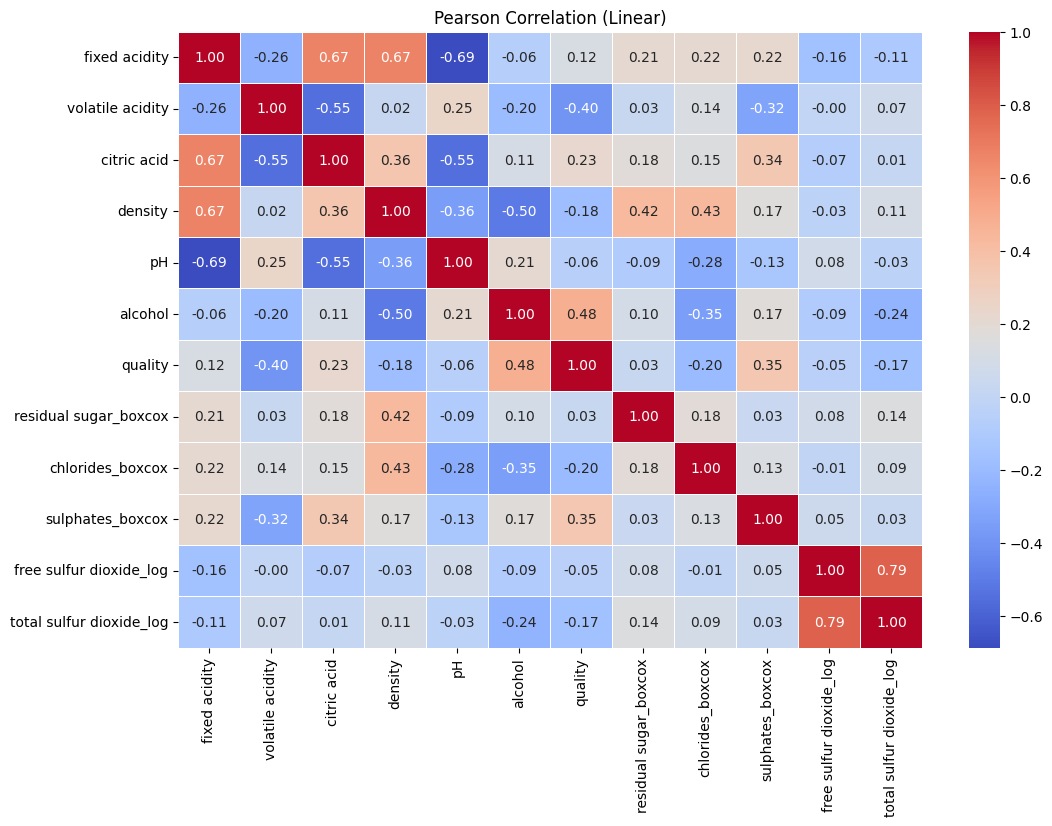

In [22]:
# Calculate Pearson correlation (linear correlation)
pearson_corr = df_new.corr(method='pearson')
# Plot the Pearson correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation (Linear)')
plt.show()

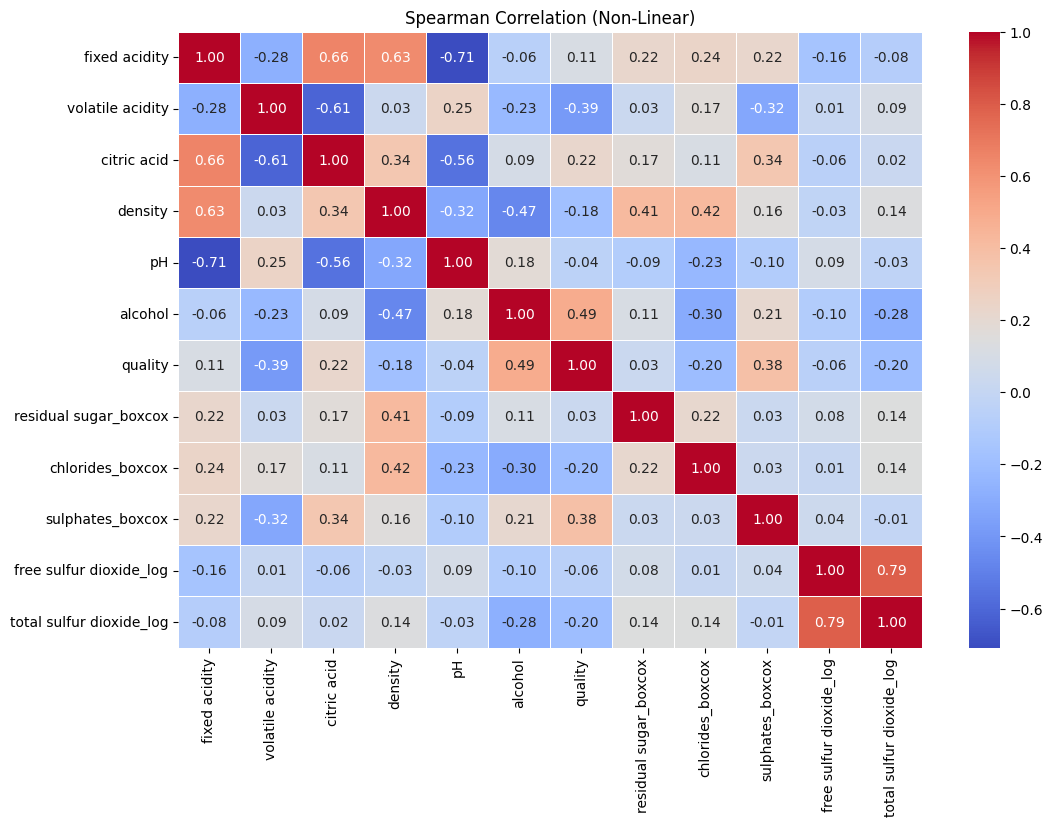

In [23]:
# Calculate Spearman correlation (non-linear correlation)
spearman_corr = df_new.corr(method='spearman')
# Plot the Spearman correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation (Non-Linear)')
plt.show()

# Feature Selection

In [24]:
# Calculate the correlation matrix
corr_matrix = df_new.corr()

# Check correlation of features with the target variable 'quality'
quality_corr = corr_matrix['quality'].sort_values(ascending=False)
print("\nCorrelation of Features with Quality:")
print(quality_corr)


Correlation of Features with Quality:
quality                     1.000000
alcohol                     0.480343
sulphates_boxcox            0.350336
citric acid                 0.228057
fixed acidity               0.119024
residual sugar_boxcox       0.026813
free sulfur dioxide_log    -0.047132
pH                         -0.055245
total sulfur dioxide_log   -0.165289
density                    -0.184252
chlorides_boxcox           -0.203539
volatile acidity           -0.395214
Name: quality, dtype: float64


### Feature selection using Lasso regularization (L1 Regularization)

In [28]:
# Define features and target variable
X = df_new.drop(columns=['quality'])
y = df_new['quality']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a Lasso model to perform feature selection
lasso = Lasso(alpha=0.01)  # You can adjust alpha for regularization strength
lasso.fit(X_scaled, y)

# Get the importance of each feature (coefficients)
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Print the coefficients (feature importance)
print("\nLasso Coefficients (Feature Importance):")
print(lasso_coefficients)

# Select features with non-zero coefficients
selected_features_lasso = lasso_coefficients[lasso_coefficients != 0].index
print("\nSelected Features from Lasso Regularization:")
print(selected_features_lasso)


Lasso Coefficients (Feature Importance):
fixed acidity               0.000538
volatile acidity           -0.181244
citric acid                -0.018153
density                    -0.000000
pH                         -0.062738
alcohol                     0.301892
residual sugar_boxcox       0.000000
chlorides_boxcox           -0.061264
sulphates_boxcox            0.175168
free sulfur dioxide_log     0.016382
total sulfur dioxide_log   -0.055321
dtype: float64

Selected Features from Lasso Regularization:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'pH', 'alcohol',
       'chlorides_boxcox', 'sulphates_boxcox', 'free sulfur dioxide_log',
       'total sulfur dioxide_log'],
      dtype='object')


### Recursive Feature Elimination (RFE) for feature selection

In [29]:
# Initialize the linear regression model
regressor = LinearRegression()

# Apply RFE (recursive feature elimination)
rfe = RFE(regressor, n_features_to_select=5)  # Specify the number of features you want to select
rfe.fit(X_scaled, y)

# Get the features selected by RFE
selected_features_rfe = X.columns[rfe.support_]
print("\nSelected Features from Recursive Feature Elimination (RFE):")
print(selected_features_rfe)



Selected Features from Recursive Feature Elimination (RFE):
Index(['volatile acidity', 'pH', 'alcohol', 'chlorides_boxcox',
       'sulphates_boxcox'],
      dtype='object')


# Regression Models
### Linear Regression

In [31]:
# Select features based on Lasso and RFE
selected_features = ['volatile acidity', 'pH', 'alcohol', 'chlorides_boxcox', 'sulphates_boxcox']

# Prepare the feature matrix X and target variable y
X = df_new[selected_features]
y = df_new['quality']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Root Mean Squared Error (RMSE): 0.6389499554192767
R-squared (R²): 0.42365544189681936


### Note:
RMSE value between 0.2 and 0.5 is ideal, are R2 indicates a 42.4% variance in the target variable.

Linear regression model captures some patterns in the data, but not strongly

### Random Forest Regression

In [102]:
# Importing necessary libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Random Forest - R-squared (R²): {r2_rf}")

Random Forest - Root Mean Squared Error (RMSE): 0.6613021913129383
Random Forest - R-squared (R²): 0.38262586295723855


### Note:
RMSE: 0.661 : Slightly higher than linear regression (0.639), meaning predictions are a bit less accurate on average.

R² 0.383: Lower than linear regression’s R² (0.424), so the model explains less of the variance.

# Classification

In [103]:
unique_quality_ids = df['quality'].unique()
print("Unique quality values:", unique_quality_ids)

Unique quality values: [5 6 7 4 8 3]


### Random Forest Classifier KFold Cross-Validation
Random Forest Classifier builds multiple decision trees to improve prediction accuracy and reduce overfitting.
K-Fold Cross-Validation tests the model on different data splits to ensure stable performance.
Together, they give a robust and unbiased estimate of model accuracy.

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Features and target
features = ['volatile acidity', 'pH', 'alcohol', 'chlorides_boxcox', 'sulphates_boxcox']
X = df_new[features]
y = df_new['quality']  # Use numeric quality directly

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_classifier, X, y, cv=kfold, scoring='accuracy')

# Train final model and show report
rf_classifier.fit(X, y)
y_pred = rf_classifier.predict(X)

print("Classification Report:")
print(classification_report(y, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nK-Fold Cross-Validation Accuracy Scores:", np.round(cv_scores, 4))
print("Mean Accuracy:", round(cv_scores.mean(), 4))
print("Standard Deviation:", round(cv_scores.std(), 4))


Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        53
           5       1.00      1.00      1.00       577
           6       1.00      1.00      1.00       535
           7       1.00      1.00      1.00       167
           8       1.00      1.00      1.00        17

    accuracy                           1.00      1359
   macro avg       1.00      1.00      1.00      1359
weighted avg       1.00      1.00      1.00      1359

Confusion Matrix:
[[ 10   0   0   0   0   0]
 [  0  53   0   0   0   0]
 [  0   0 577   0   0   0]
 [  0   0   0 535   0   0]
 [  0   0   0   0 167   0]
 [  0   0   0   0   0  17]]

K-Fold Cross-Validation Accuracy Scores: [0.6066 0.5809 0.5919 0.5735 0.572 ]
Mean Accuracy: 0.585
Standard Deviation: 0.0129


### Performing the same on quality labels of low, medium and high instead of predicting quality score (3-8)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Create classification labels from 'quality'
df_new['quality_label'] = df_new['quality'].apply(lambda x: 'Low' if x <= 4 else ('Medium' if x <= 6 else 'High'))

# Features and target
features = ['volatile acidity', 'pH', 'alcohol', 'chlorides_boxcox', 'sulphates_boxcox']
X = df_new[features]
y = df_new['quality_label']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_classifier, X, y_encoded, cv=kfold, scoring='accuracy')

# Train final model and show report
rf_classifier.fit(X, y_encoded)
y_pred = rf_classifier.predict(X)

print("Classification Report:")
print(classification_report(y_encoded, y_pred, target_names=le.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_encoded, y_pred))

print("\nK-Fold Cross-Validation Accuracy Scores:", np.round(cv_scores, 4))
print("Mean Accuracy:", round(cv_scores.mean(), 4))
print("Standard Deviation:", round(cv_scores.std(), 4))


Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       184
         Low       1.00      1.00      1.00        63
      Medium       1.00      1.00      1.00      1112

    accuracy                           1.00      1359
   macro avg       1.00      1.00      1.00      1359
weighted avg       1.00      1.00      1.00      1359

Confusion Matrix:
[[ 184    0    0]
 [   0   63    0]
 [   0    0 1112]]

K-Fold Cross-Validation Accuracy Scores: [0.8382 0.8162 0.8346 0.8456 0.8192]
Mean Accuracy: 0.8307
Standard Deviation: 0.0113


### Note: 
This seems to be overfitting but performing better. Could work better with a larger dataset.